---

###**PROYECTO DE INTELIGENCIA ARTIFICIAL:**

> **MONITOR Y PREDICTOR DE OVULACIÓN POR MEDIO DEL MÉTODO DE TEMPERATURA BASAL**





---

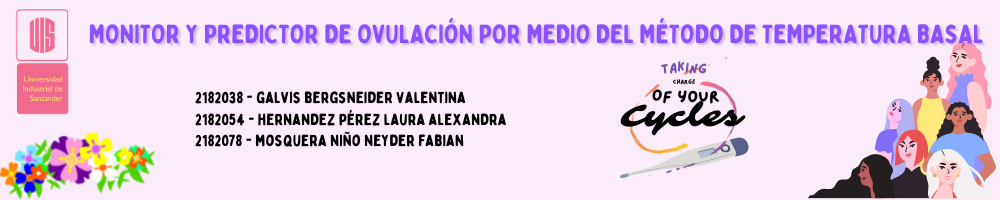



---


In [ ]:
#@title **Importar Drive** { display-mode: "form" }
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title **Importar Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [ ]:
#@title **Cargar Dataset** { display-mode: "form" }
dataset = pd.read_csv('/content/gdrive/MyDrive/Proyecto_IA/Dataset.csv')

---
#1. **TRATAMIENTOS DE DATOS**
---



In [ ]:
#@title **Una vez cargado el dataset se procede a arreglarlo para poder comenzar a trabajar con sus datos** { display-mode: "form" }
dataset.head(17)

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo,ovulacion
0,3/8/2021,NaN,1,0,0,0,NaN,1,1,0
1,4/8/2021,NaN,1,0,0,0,NaN,2,1,0
2,5/8/2021,NaN,1,0,0,0,NaN,3,1,0
3,6/8/2021,36.39,1,0,0,1,NaN,4,1,0
4,7/8/2021,36.29,1,0,0,0,NaN,5,1,0
5,8/8/2021,36.29,1,0,0,0,NaN,6,1,0
6,9/8/2021,36.24,1,0,0,0,NaN,7,1,0
7,10/8/2021,36.10,1,0,0,0,NaN,8,1,0
8,11/8/2021,36.31,0,0,0,0,NaN,9,1,0
9,12/8/2021,36.41,0,0,0,1,NaN,10,1,0


In [ ]:
#@title **code:** Los valores en las condiciones de exclusión de temperatura dados en NaN se convertierten en 0, también se agrega una nueva columna llamada "Ciclo"

dataset.Bebio.fillna(0, inplace=True)
dataset.Enferma.fillna(0, inplace=True)
dataset.Mal_Sueño.fillna(0, inplace=True)
dataset.Algoritmo.fillna(0, inplace=True)
dataset.head(dataset.shape[0])

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo,ovulacion
0,3/8/2021,NaN,1,0,0,0,0.0,1,1,0
1,4/8/2021,NaN,1,0,0,0,0.0,2,1,0
2,5/8/2021,NaN,1,0,0,0,0.0,3,1,0
3,6/8/2021,36.39,1,0,0,1,0.0,4,1,0
4,7/8/2021,36.29,1,0,0,0,0.0,5,1,0
...,...,...,...,...,...,...,...,...,...,...
163,13/1/2022,36.82,0,0,0,0,0.0,26,6,0
164,14/1/2022,36.87,0,0,0,0,0.0,27,6,0
165,15/1/2022,36.66,0,0,0,0,0.0,28,6,0
166,16/1/2022,36.71,0,0,0,0,0.0,29,6,0


------
# FASE FOLICULAR Y FASE LÚTEA:

FASE FOLICULAR = Fase antes de la ovulación, suele ser la fase más larga del ciclo.

In [ ]:
Ciclo=[]
conteo=1
UltCiclo=dataset.at[dataset.index[-1], "Ciclo"]
Ciclodata=[]
Duracion_Fase_Folicular=[]
#Mirar del ciclo 1-al ultimo
while conteo < UltCiclo:
  #Crear dataset donde Ciclo sea = conteo
  Ciclo = dataset['Ciclo'] == conteo
  #Guardar dataset
  Ciclodata = dataset[Ciclo]
  #Volver array y guardar el dia de ovulación en diaovula
  diaovula=Ciclodata[Ciclodata['ovulacion']==1].values
  
  #Para hallar la fase folicular se le resta 1 al día de ovulación
  #Guardar en array
  Duracion_Fase_Folicular.append(diaovula[0][7]-1)
  conteo=conteo+1
print(Duracion_Fase_Folicular)
#Tener en cuenta que empieza el listado desde 0


[14, 16, 14, 14, 15]


---
###FASE LÚTEA = Fase después de la ovulación, suele ser más corta que la Fase 

Folicular.

Se contó la Fase Lútea desde el día siguiente de la ovulación hasta el último día del ciclo (Antes de la menstruación)

In [ ]:
Ciclo=[]
conteo=1
UltCiclo=dataset.at[dataset.index[-1], "Ciclo"]
Ciclodata=[]
Duracion_Fase_Folicular=[]
#Mirar del ciclo 1-al ultimo
while conteo < UltCiclo:
  #Crear dataset donde Ciclo sea = conteo
  Ciclo = dataset['Ciclo'] == conteo
  #Guardar dataset
  Ciclodata = dataset[Ciclo]
  #Volver array y guardar el dia de ovulación en diaovula
  diaovula=Ciclodata[Ciclodata['ovulacion']==1].values
  
  #Para hallar la fase folicular se le resta 1 al día de ovulación
  #Guardar en array
  Duracion_Fase_Folicular.append(diaovula[0][7]-1)
  conteo=conteo+1
print(Duracion_Fase_Folicular)
#Tener en cuenta que empieza el listado desde 0

[14, 16, 14, 14, 15]


---
# Recta del umbral
Aumento mínimo para empezar a detectar la ovulación

In [ ]:
#@ Linea recta para las graficas (umbral de subida de temperaturas)
filtro = dataset['ovulacion'] == 1
datarecta = dataset[filtro]
recta=datarecta['Temperatura'].mean()
print(recta)


36.495


In [ ]:
#@ Promedio duración del periodo
cic=(dataset.query('Ciclo==1')).query('Periodo==1')
a=cic.iloc[-1,7]
cic=(dataset.query('Ciclo==2')).query('Periodo==1')
b=cic.iloc[-1,7]
cic=(dataset.query('Ciclo==3')).query('Periodo==1')
c=cic.iloc[-1,7]
cic=(dataset.query('Ciclo==4')).query('Periodo==1')
d=cic.iloc[-1,7]
cic=(dataset.query('Ciclo==5')).query('Periodo==1')
e=cic.iloc[-1,7]
cic=(dataset.query('Ciclo==6')).query('Periodo==1')
f=cic.iloc[-1,7]
vecper=[a,b,c,d,e,f]
prom=round(np.mean(vecper))
print(vecper,prom)

[8, 7, 6, 6, 6, 8] 7


---
# Algoritmo: Sueño, Enfermedad y Bebida -> Temperatura = NaN
En esta parte se recorre las columnas de Mal_Sueño, Enferma y bebio, si la persona no descansó lo suficiente (mínimo 3 horas) la casilla de Mal_Sueño toma valor de 1, si la persona estuvo enferma la casilla Enferma también tomará el valor de 1. Finalmente, si la persona consumió bebidas alcoholicas la casilla tomará valor de 1. Ahora, si alguna de esas 3 columnas tiene valor de 1 entonces Algoritmo = 1. Esto significa que la temperatura de esa fila no se podrá usar y tomará un valor de NaN. 


In [ ]:
#Revision de datos antes del rellenado de la columna Algoritmo y del cambio de Temperaturas
dataset.head(10)#Revision del resultado

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo,ovulacion
0,3/8/2021,NaN,1,0,0,0,0.0,1,1,0
1,4/8/2021,NaN,1,0,0,0,0.0,2,1,0
2,5/8/2021,NaN,1,0,0,0,0.0,3,1,0
3,6/8/2021,36.39,1,0,0,1,0.0,4,1,0
4,7/8/2021,36.29,1,0,0,0,0.0,5,1,0
5,8/8/2021,36.29,1,0,0,0,0.0,6,1,0
6,9/8/2021,36.24,1,0,0,0,0.0,7,1,0
7,10/8/2021,36.10,1,0,0,0,0.0,8,1,0
8,11/8/2021,36.31,0,0,0,0,0.0,9,1,0
9,12/8/2021,36.41,0,0,0,1,0.0,10,1,0


In [ ]:
 #renombrar el dataset
for i in range(dataset.shape[0]):#For para recorrer todas las filas del dataset
  a=dataset.iloc[i,3]# inicialización de recorrido por columna Bebio=3
  b=dataset.iloc[i,4]# inicialización de recorrido por columna Enferma=4
  c=dataset.iloc[i,5]# inicialización de recorrido por columna Mal_sueño=5
  if a==1 or  b==1 or  c==1 :
    dataset.iloc[i,6]=int(1)#Rellena la celda de la columna algoritmo(6)
    dataset.iloc[i,1]=np.nan
  else:
    dataset.iloc[i,6]=int(0)
  #Remplazo de Algoritmo dependiendo de Bebio,Enferma,Mal Sueño 
dataset.head(10)#Revision del resultado

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo,ovulacion
0,3/8/2021,NaN,1,0,0,0,0.0,1,1,0
1,4/8/2021,NaN,1,0,0,0,0.0,2,1,0
2,5/8/2021,NaN,1,0,0,0,0.0,3,1,0
3,6/8/2021,NaN,1,0,0,1,1.0,4,1,0
4,7/8/2021,36.29,1,0,0,0,0.0,5,1,0
5,8/8/2021,36.29,1,0,0,0,0.0,6,1,0
6,9/8/2021,36.24,1,0,0,0,0.0,7,1,0
7,10/8/2021,36.10,1,0,0,0,0.0,8,1,0
8,11/8/2021,36.31,0,0,0,0,0.0,9,1,0
9,12/8/2021,NaN,0,0,0,1,1.0,10,1,0


---
## Eliminacion -> Temperatura = NaN

Aquí se eliminan todos los registros donde Tempratura = NaN




In [ ]:
dataset=dataset.dropna()

Se verifica que los cambios se hicieran correctamente: 

In [ ]:
#Revision de datos después de la eliminación de Temperaturas = NaN
dataset.head(10) #Revision del resultado

,Fecha,Temperatura,Periodo,Bebio,Enferma,Mal_Sueño,Algoritmo,Dia_Ciclo,Ciclo,ovulacion
4,7/8/2021,36.29,1,0,0,0,0.0,5,1,0
5,8/8/2021,36.29,1,0,0,0,0.0,6,1,0
6,9/8/2021,36.24,1,0,0,0,0.0,7,1,0
7,10/8/2021,36.10,1,0,0,0,0.0,8,1,0
8,11/8/2021,36.31,0,0,0,0,0.0,9,1,0
10,13/8/2021,36.21,0,0,0,0,0.0,11,1,0
11,14/8/2021,36.36,0,0,0,0,0.0,12,1,0
12,15/8/2021,36.15,0,0,0,0,0.0,13,1,0
13,16/8/2021,36.36,0,0,0,0,0.0,14,1,0
14,17/8/2021,36.26,0,0,0,0,0.0,15,1,1


Revision del periodo

In [ ]:
#Visualizar periodo
Ciclo=dataset[(dataset['Ciclo']==1)]
Pruebaa=Ciclo[(dataset['Periodo']==1)]
periodo=[]
k=len(Pruebaa)
corre=0
while corre < k:
  periodo.append(Pruebaa.iloc[corre][7])
  corre=corre+1
print(periodo)

[5, 6, 7, 8]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


---
# 2.**MÉTODOS REGRESIÓN**
Se realizo un grafico de correlación para verificar el dataset y la mejor relación con temperatura.

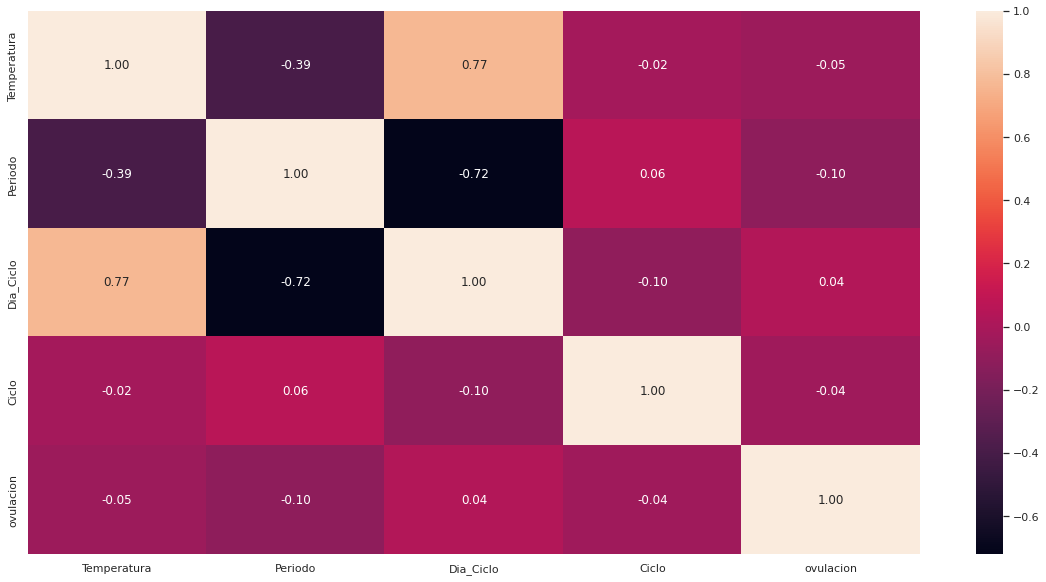

In [ ]:
#Grafico de correlación
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
plt.subplots(figsize=(20,10)) #Importante para que se vean todas las correlaciones
d= dataset.drop(['Bebio','Enferma','Mal_Sueño','Algoritmo'],axis=1)
corr=d.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

---
# **MÉTODO - DecisionTreeRegressor**

In [ ]:
#DECISIONTREE_REGRESSOR()8
def predictmes(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18,#AYER 0.15
                                                      shuffle=False)
  regressor = DecisionTreeRegressor()
  regressor.fit(X_train, y_train)

  P=regressor.predict(X_test)
  errores1=[]
#MSE Error cuadrático medio (Error cuadrático medio)
  mse = mean_squared_error(y_test,P)
    #RMSE RAIZ Error cuadrático medio (Error cuadrático medio)
  rmse =np.sqrt(mse)
    #MAE Error absoluto medio (Error absoluto medio)
  mae = mean_absolute_error(y_test,P)
    #Añadir el MSE,RMSE, MAE a la lista.
  errores1.append(mse)
  errores1.append(rmse)
  errores1.append(mae)
  print("\n" "RESULTADO:" "\n")
  print("TOTAL TEMPERATURAS  Y TOTAL DE DIAS DE PROXIMO MES= " ,len(P),"\n \n",P,'\n' )
  return "Vector de temperaturas del proximo mes ", P, ' Estimador:',regressor,' Lista de errores(mse,rmse,mae) : ',errores1
X01 = dataset[["Dia_Ciclo", "Ciclo"]]
y01 = dataset["Temperatura"]
predictmes(X01,y01)


RESULTADO:

TOTAL TEMPERATURAS  Y TOTAL DE DIAS DE PROXIMO MES=  27 
 
 [36.48 36.53 36.34 36.32 36.32 36.16 36.24 36.24 36.19 36.35 36.64 36.32
 36.34 36.31 36.4  36.72 36.72 36.8  36.8  36.67 36.82 36.65 36.71 36.76
 36.76 36.77 36.59] 



('Vector de temperaturas del proximo mes ',
 array([36.48, 36.53, 36.34, 36.32, 36.32, 36.16, 36.24, 36.24, 36.19,
        36.35, 36.64, 36.32, 36.34, 36.31, 36.4 , 36.72, 36.72, 36.8 ,
        36.8 , 36.67, 36.82, 36.65, 36.71, 36.76, 36.76, 36.77, 36.59]),
 ' Estimador:',
 DecisionTreeRegressor(),
 ' Lista de errores(mse,rmse,mae) : ',
 [0.024770370370370647, 0.15738605519667442, 0.13111111111111212])

---
###Temperatura y día de ovulación

In [ ]:
def ovula(z):
  i=0
  j=1
  m=2
  k=3
  lz=len(z)
  for i in range(lz):
    for j in range(lz):
      for k in range(lz):
        for m in range(lz):
          a=z[i]-z[j]
          if a>=0.5 and z[j]>int(recta) and z[k]>int(recta) and z[m]>int(recta):
            Temp_ov=z[i-1]
            ov=i-1
            print("La temperatura del dia de ovulacion es = ",Temp_ov,"°C y El dia de ovulacion es el = ",ov)
            i=range(len(z))
            j=range(len(z))
            return ov,Temp_ov
P=[36.48, 36.53, 36.34, 36.32, 36.32, 36.16, 36.24, 36.24, 36.19,
        36.35, 36.64, 36.32, 36.34, 36.31, 36.4 , 36.72, 36.72, 36.8 ,
        36.8 , 36.67, 36.82, 36.65, 36.71, 36.76, 36.76, 36.77, 36.59]
ovula(P)

La temperatura del dia de ovulacion es =  36.4 °C y El dia de ovulacion es el =  14


(14, 36.4)

---
# **MÉTODO - RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
def estmes(X01,y01):
    #Entenamiento con train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X01, y01, test_size=0.18, shuffle=False)
    #Estimador con RandomForestRegressor
    est =  RandomForestRegressor()
    est.fit(X_train,y_train)
    #Crear la lista de errores
    er2=[]
    P2=est.predict(X_test)
    #MSE Error cuadrático medio (Error cuadrático medio)
    mse = mean_squared_error(y_test,P2)
    #RMSE RAIZ Error cuadrático medio (Error cuadrático medio)
    rmse =np.sqrt(mse)
    #MAE Error absoluto medio (Error absoluto medio)
    mae = mean_absolute_error(y_test,P2)
    #Añadir el MSE,RMSE, MAE a la lista.
    er2.append(mse)
    er2.append(rmse)
    er2.append(mae)
    print("\n" "RESULTADO:" "\n")
    print("TOTAL TEMPERATURAS  Y TOTAL DE DIAS DE PROXIMO MES= " ,len(P2),"\n \n",P2,'\n' )
    return "Vector de temperaturas del proximo mes ", P2, ' Estimador:',est,' Lista de errores(mse,rmse,mae) : ',er2 
estmes(X01,y01)


RESULTADO:

TOTAL TEMPERATURAS  Y TOTAL DE DIAS DE PROXIMO MES=  27 
 
 [36.4978 36.4452 36.3624 36.3274 36.3107 36.1943 36.2319 36.2344 36.2156
 36.2961 36.4931 36.3945 36.332  36.3392 36.4141 36.5902 36.6504 36.7558
 36.8021 36.7195 36.7783 36.7124 36.7216 36.7375 36.7336 36.6854 36.6388] 



('Vector de temperaturas del proximo mes ',
 array([36.4978, 36.4452, 36.3624, 36.3274, 36.3107, 36.1943, 36.2319,
        36.2344, 36.2156, 36.2961, 36.4931, 36.3945, 36.332 , 36.3392,
        36.4141, 36.5902, 36.6504, 36.7558, 36.8021, 36.7195, 36.7783,
        36.7124, 36.7216, 36.7375, 36.7336, 36.6854, 36.6388]),
 ' Estimador:',
 RandomForestRegressor(),
 ' Lista de errores(mse,rmse,mae) : ',
 [0.01591799074074058, 0.12616651988836253, 0.10920370370370328])

In [ ]:
P2=[36.4966, 36.4995, 36.3569, 36.3255, 36.31  , 36.1978, 36.232 ,
        36.2369, 36.2178, 36.3169, 36.5202, 36.3884, 36.3237, 36.334 ,
        36.4094, 36.6052, 36.6433, 36.753 , 36.8162, 36.7084, 36.776 ,
        36.7121, 36.7259, 36.741 , 36.7332, 36.7065, 36.6413]
ovula(P2)

La temperatura del dia de ovulacion es =  36.6433 °C y El dia de ovulacion es el =  16


(16, 36.6433)

---
# **3.RESULTADOS Y CONCLUSIONES**

*   Se evidenció que la ovulación fue en el día 17 en el ciclo predicho.
*   Los periodos de los ciclos en las diferentes gráficas estan inicializados desde 0 hasta n, debido a los arrays pero sabiendo que el 0 es 1.

---
#**GRÁFICA** CORRESPONDIENTE A CADA UNO DE LOS CICLOS

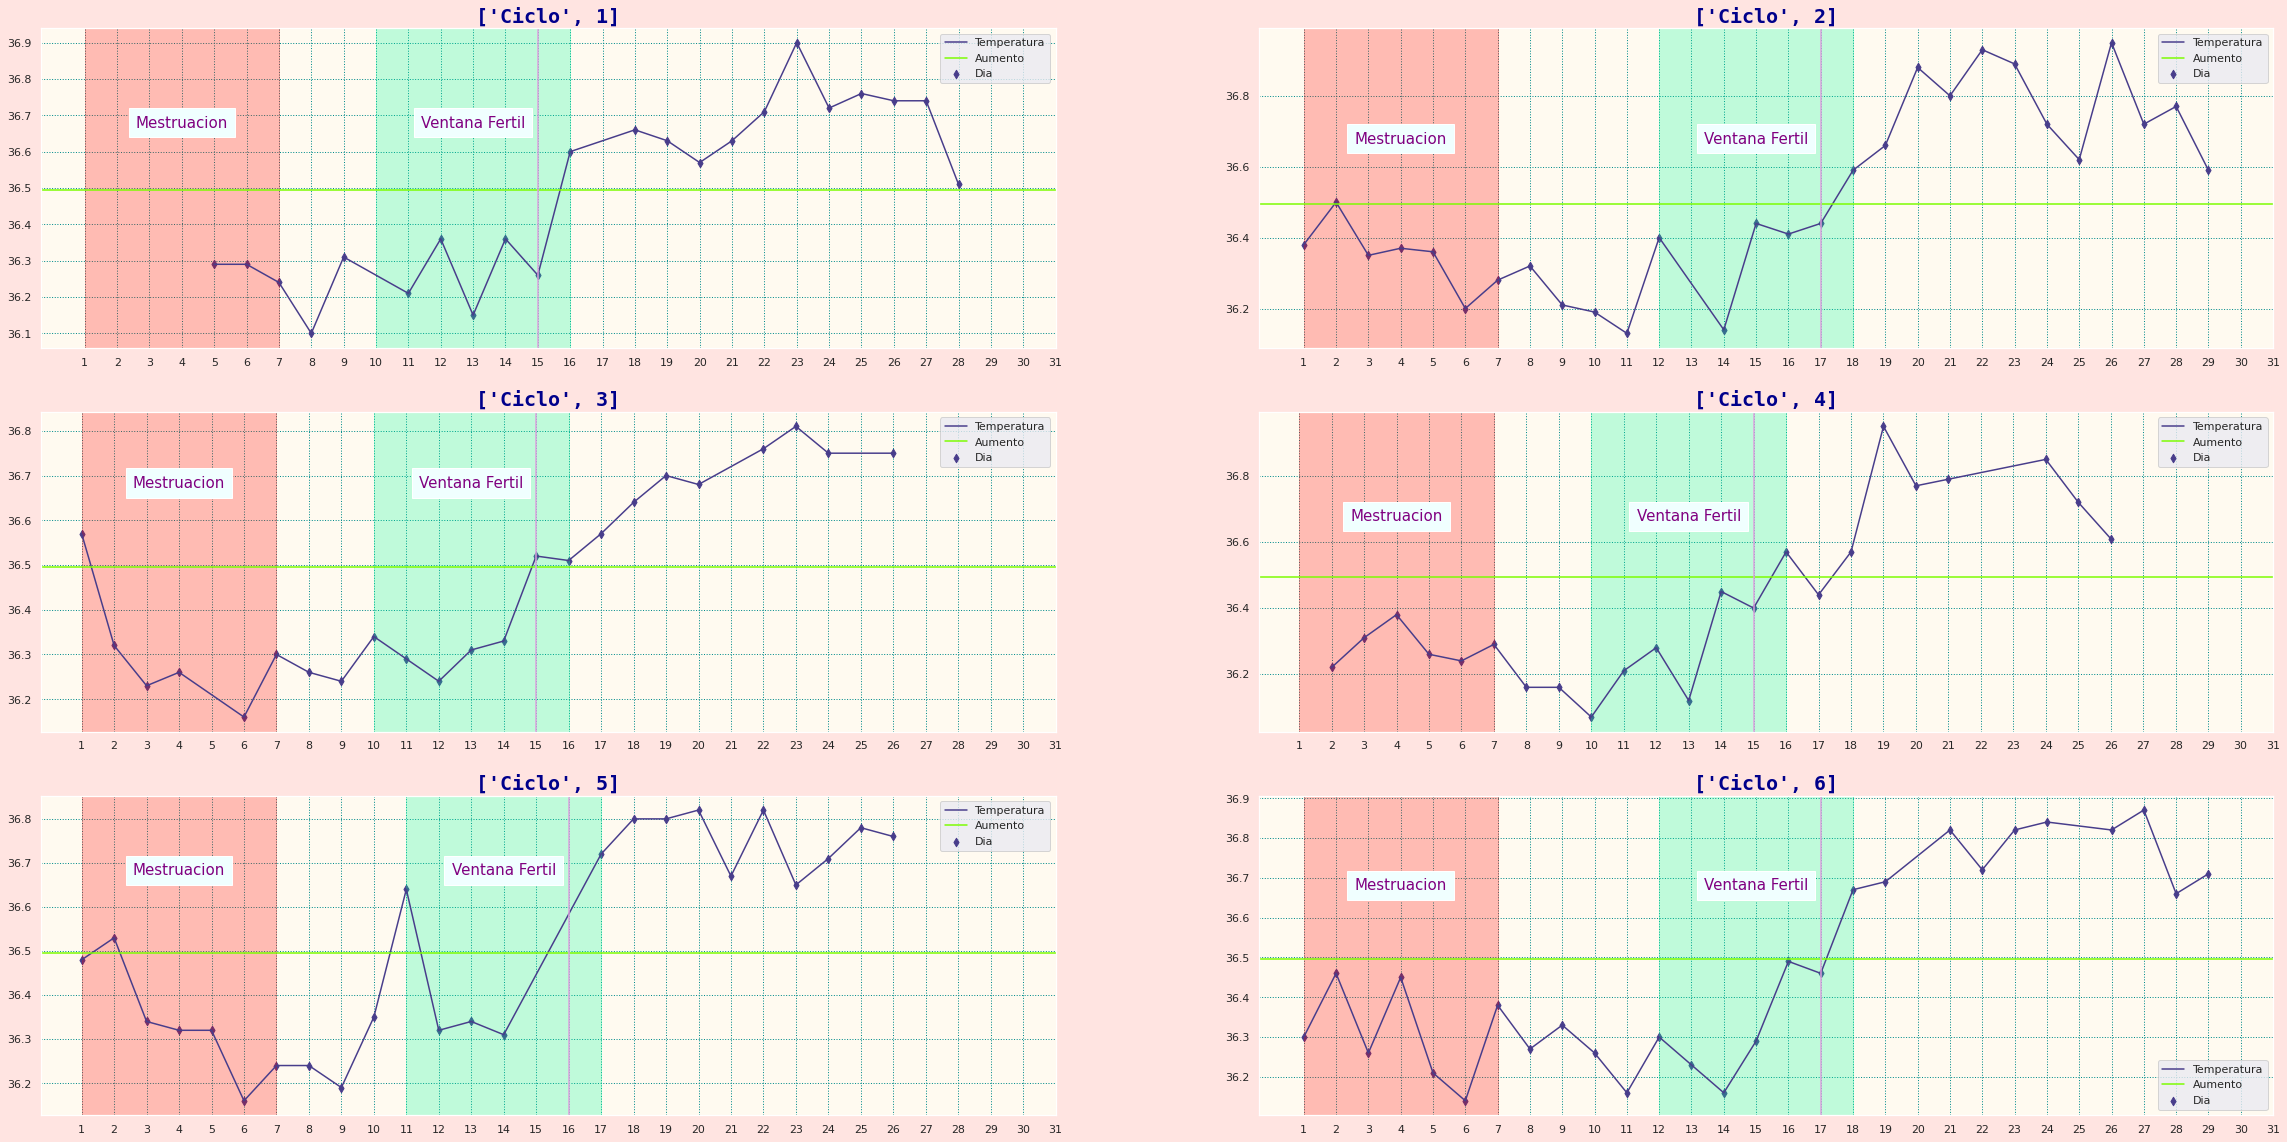

In [ ]:
##Graficos por ciclo
c1=dataset[(dataset['Ciclo']==1)] #por ciclos
c2=dataset[(dataset['Ciclo']==2)] #por ciclos
c3=dataset[(dataset['Ciclo']==3)] #por ciclos
c4=dataset[(dataset['Ciclo']==4)] #por ciclos
c5=dataset[(dataset['Ciclo']==5)] #por ciclos
c6=dataset[(dataset['Ciclo']==6)] #por ciclos

#Días de ovulación
filtroc1 = c1[(c1['ovulacion']==1)]
ovulacionc1=filtroc1.iloc[0]['Dia_Ciclo']
filtroc2 = c2[(c2['ovulacion']==1)]
ovulacionc2=filtroc2.iloc[0]['Dia_Ciclo']
filtroc3 = c3[(c3['ovulacion']==1)]
ovulacionc3=filtroc3.iloc[0]['Dia_Ciclo']
filtroc4 = c4[(c4['ovulacion']==1)]
ovulacionc4=filtroc4.iloc[0]['Dia_Ciclo']
filtroc5 = c5[(c5['ovulacion']==1)]
ovulacionc5=16
filtroc6 = c6[(c6['ovulacion']==1)]
ovulacionc6=filtroc6.iloc[0]['Dia_Ciclo']


plt.figure(figsize=(40,20), facecolor='mistyrose')

plt.subplot(3,2, 1, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c1['Dia_Ciclo'], c1['Temperatura'], label="Periodo 1", color="darkslateblue" )
#plt.scatter(c1['Dia_Ciclo'], c1['Temperatura']['ovulacion'==1], label="Periodo 1", color="r")
plt.scatter(c1['Dia_Ciclo'], c1['Temperatura'], label="P", color="darkslateblue",marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c1.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc1,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc1-5,ovulacionc1+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(13, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.subplot(3,2, 2, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c2['Dia_Ciclo'], c2['Temperatura'], label="Periodo 1", color="darkslateblue")
plt.scatter(c2['Dia_Ciclo'], c2['Temperatura'], label="Periodo 1", color="darkslateblue",marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c2.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc2,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc2-5,ovulacionc2+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(15, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.subplot(3,2, 3, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c3['Dia_Ciclo'], c3['Temperatura'], label="Periodo 1", color="darkslateblue")
plt.scatter(c3['Dia_Ciclo'], c3['Temperatura'], label="Periodo 1", color="darkslateblue",marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c3.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc3,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc3-5,ovulacionc3+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(13, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.subplot(3,2, 4, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c4['Dia_Ciclo'], c4['Temperatura'], label="Periodo 1", color="darkslateblue")
plt.scatter(c4['Dia_Ciclo'], c4['Temperatura'], label="Periodo 1", color="darkslateblue",marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c4.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc4,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc4-5,ovulacionc4+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(13, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.subplot(3,2,5, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c5['Dia_Ciclo'], c5['Temperatura'], label="Periodo 1", color="darkslateblue")
plt.scatter(c5['Dia_Ciclo'], c5['Temperatura'], label="Periodo 1", color="darkslateblue",marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c5.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc5,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc5-5,ovulacionc5+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(14, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.subplot(3,2,6, facecolor='floralwhite');
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)
plt.plot(c6['Dia_Ciclo'], c6['Temperatura'], label="Periodo 1", color="darkslateblue")
plt.scatter(c6['Dia_Ciclo'], c6['Temperatura'], label="Periodo 1", color="darkslateblue", marker='d')
plt.axhline(y=recta, color='lawngreen')
plt.legend(['Temperatura', 'Aumento','Dia','Ovulación confirmada'])
fuentel={'family':'monospace','weight':'bold','color':'darkblue','size':20}
plt.title(['Ciclo',c6.iloc[2]['Ciclo']], fontdict=fuentel,loc='center')
plt.axvline(x=ovulacionc6,color='plum')
plt.axvspan(1,7,color='red', alpha=0.25)
plt.axvspan(ovulacionc6-5,ovulacionc6+1,color='mediumspringgreen', alpha=0.25)
plt.text(4, 36.7, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(15, 36.7, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.xticks(range(1,32,1))

plt.show()

---
# **GRÁFICO DEL MEJOR RESULTADO CON MENOR ERROR**

La temperatura del dia de ovulacion es =  36.6433 °C y El dia de ovulacion es el =  16
La temperatura del dia de ovulacion es =  36.6433 °C y El dia de ovulacion es el =  16
La temperatura del dia de ovulacion es =  36.6433 °C y El dia de ovulacion es el =  16


<function matplotlib.pyplot.show>

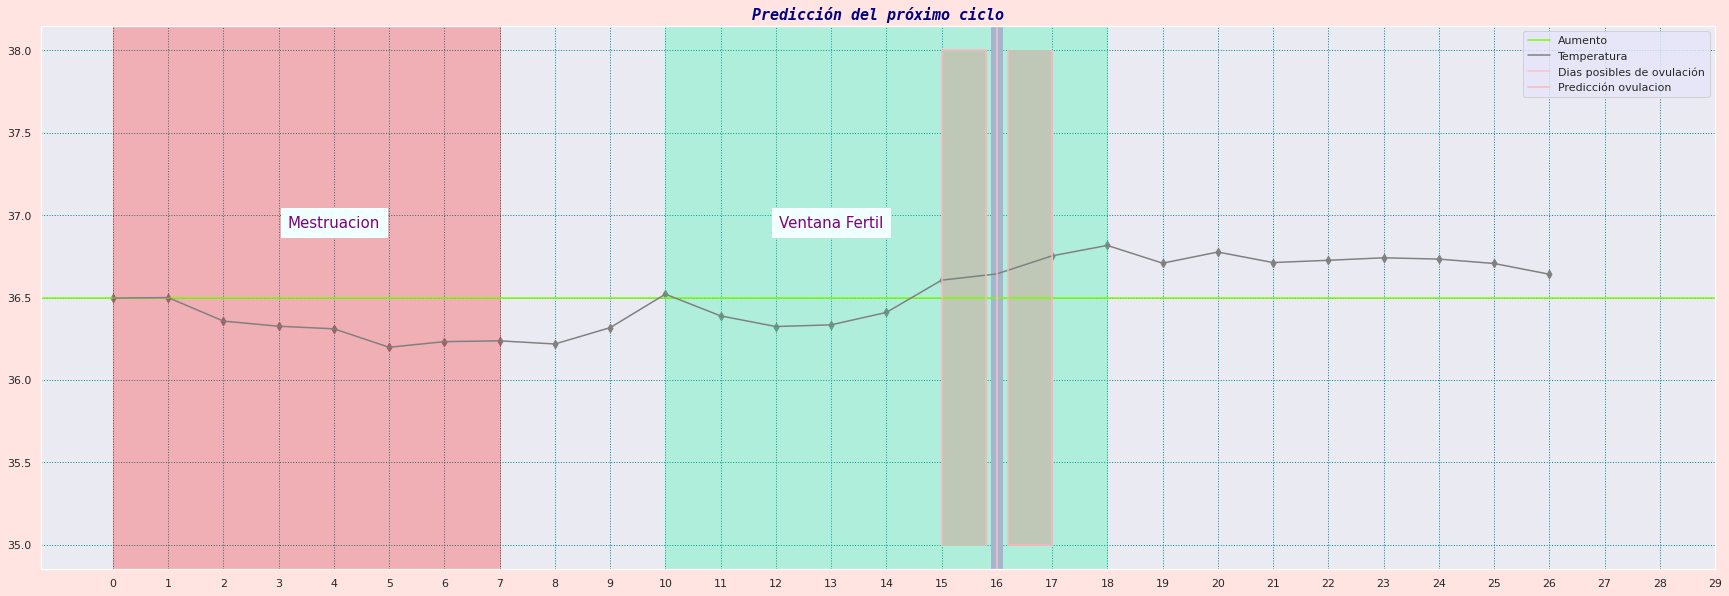

In [ ]:
#def grafico(P,P2,errores1,errores2):

plt.figure(figsize=(30,10), facecolor='mistyrose')
plt.scatter(range(0,len(P2)),P2, label="P", color="gray", marker='d')
plt.grid(color='darkcyan', linestyle='dotted', linewidth=1)

plt.axhline(y=recta, color='lawngreen')
plt.plot(range(0,len(P2)),P2, label="Periodo 1", color="gray" )

plt.scatter(ovula(P2)[0],ovula(P2)[1], label="P", c="black")
plt.axvline(ovula(P2)[0],c='pink');
fuentel={'family':'monospace','style':'italic','weight':'bold','color':'navy','size':15}
plt.title('Predicción del próximo ciclo', fontdict=fuentel,loc='center')

x=[15,15,15.8,15.8];x2=[16.2,16.2,17,17]
y=[35,38,38,35];y2=[38,35,35,38]
plt.plot(x,y,'y',x2,y2,'y',color='lightpink')
plt.fill(x,y,'y',x2,y2,'y', color='lightpink')
plt.axvspan(15.9,16.1,color='plum')

plt.axvspan(0,prom,color='red', alpha=0.25)
plt.axvspan(ovulacionc1-5,ovulacionc1+3,color='mediumspringgreen', alpha=0.25)
plt.text(4, 37, 'Mestruacion',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})
plt.text(13, 37, 'Ventana Fertil',fontsize=15,color="purple",verticalalignment ='top', horizontalalignment ='center',bbox ={'facecolor':'azure', 'pad':7})

plt.legend(['Aumento', 'Temperatura','Dias posibles de ovulación','Predicción ovulacion'],facecolor='lavender')

plt.xticks(range(0,30,1))
plt.show

---

## **REFERENCIAS** 

[1] [Official numpy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

[2] [Matplotlib](https://matplotlib.org/)

[3] [Seaborn](https://seaborn.pydata.org/)

[4]  [Plotly documentation for Python](https://plotly.com/python/)

[5] [DATASET](https://github.com/valegb13/Proyecto-IA/blob/main/Dataset.csv)

[6] [Asesoramiento/educación sanitaria a la mujer. Métodos anticonceptivos naturales (II)](https://www.federacion-matronas.org/wp-content/uploads/2018/01/vol6n3pag5-13.pdf)

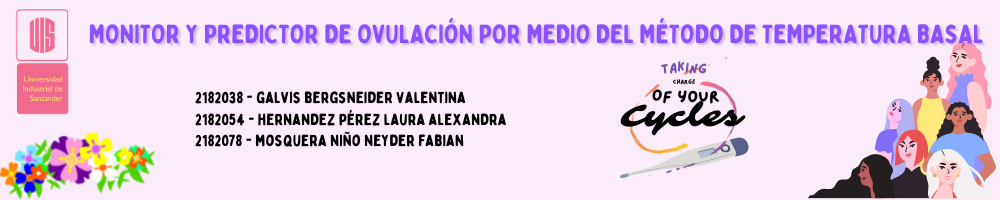